<a href="https://colab.research.google.com/github/HajidMunhbat/hajid.github.io/blob/main/Student_Performance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# load dataset (student Portuguese scores)

import pandas as pd
d = pd.read_csv('student-por.csv', sep=';')
len(d)

649

In [5]:
# generate binary label (pass/fail) based on G1+G2+G3 (test, grades, each 0-20pts); threshold for passing is sum>=30
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1','G2','G3'], axis=1)
d.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... internet rom

In [6]:
# use one-hot encoding on categorical columns
d = pd.get_dummies(d, columns = ['sex', 'school','address', 'famsize', 'Pstatus',
                                 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                                'famsup', 'paid', 'activities', 'nursery', 'higher',
                                 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [7]:
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing students in whole dataset:
import numpy as np
print('Passing: %d out of %d (%.2f%%)' % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))


Passing: 328 out of 649 (50.54%)


In [8]:
# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
t = t.fit(d_train_att, d_train_pass)

In [10]:
# save tree
tree.export_graphviz(t, out_file='student-performance.dot', label='all', impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=['fail', 'pass'],
                     filled=True, rounded=True)

In [11]:
t.score(d_test_att, d_test_pass)

0.6778523489932886

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.05)


In [15]:
for max_depth in range(1, 20):
  t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  scores = cross_val_score(t, d_att, d_pass, cv=5)
  print('Max depth: %d, Accuracy: %0.2f (+/- %0.2f)' % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.64 (+/- 0.09)
Max depth: 2, Accuracy: 0.69 (+/- 0.09)
Max depth: 3, Accuracy: 0.67 (+/- 0.10)
Max depth: 4, Accuracy: 0.68 (+/- 0.05)
Max depth: 5, Accuracy: 0.66 (+/- 0.04)
Max depth: 6, Accuracy: 0.69 (+/- 0.07)
Max depth: 7, Accuracy: 0.68 (+/- 0.09)
Max depth: 8, Accuracy: 0.68 (+/- 0.05)
Max depth: 9, Accuracy: 0.69 (+/- 0.06)
Max depth: 10, Accuracy: 0.69 (+/- 0.04)
Max depth: 11, Accuracy: 0.66 (+/- 0.05)
Max depth: 12, Accuracy: 0.67 (+/- 0.04)
Max depth: 13, Accuracy: 0.67 (+/- 0.06)
Max depth: 14, Accuracy: 0.66 (+/- 0.04)
Max depth: 15, Accuracy: 0.66 (+/- 0.03)
Max depth: 16, Accuracy: 0.67 (+/- 0.04)
Max depth: 17, Accuracy: 0.66 (+/- 0.05)
Max depth: 18, Accuracy: 0.65 (+/- 0.04)
Max depth: 19, Accuracy: 0.66 (+/- 0.03)


In [16]:
depth_acc = np.empty((19, 3), float)
i= 0
for max_depth in range(1, 20):
  t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  scores = cross_val_score(t, d_att, d_pass, cv=5)
  depth_acc[i,0] = max_depth
  depth_acc[i,1] = scores.mean()
  depth_acc[i,2] = scores.std() * 2
  i += 1
  
depth_acc

array([[1.00000000e+00, 6.37865236e-01, 9.44484497e-02],
       [2.00000000e+00, 6.87203339e-01, 8.95842009e-02],
       [3.00000000e+00, 6.73381038e-01, 1.02793481e-01],
       [4.00000000e+00, 6.79511032e-01, 5.18985889e-02],
       [5.00000000e+00, 6.65664878e-01, 3.49167945e-02],
       [6.00000000e+00, 6.84197973e-01, 7.86883830e-02],
       [7.00000000e+00, 6.84162194e-01, 1.08415588e-01],
       [8.00000000e+00, 6.73381038e-01, 3.16917899e-02],
       [9.00000000e+00, 6.99534884e-01, 2.92494844e-02],
       [1.00000000e+01, 6.85664878e-01, 6.91479656e-02],
       [1.10000000e+01, 6.65569469e-01, 6.43840876e-02],
       [1.20000000e+01, 6.76410256e-01, 4.05614768e-02],
       [1.30000000e+01, 6.45605247e-01, 7.21936005e-02],
       [1.40000000e+01, 6.73321407e-01, 5.93393786e-02],
       [1.50000000e+01, 6.65652952e-01, 1.73691895e-02],
       [1.60000000e+01, 6.65629100e-01, 2.14309113e-02],
       [1.70000000e+01, 6.67191413e-01, 2.92739820e-02],
       [1.80000000e+01, 6.50232

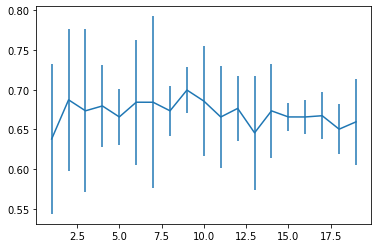

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

# New Section